<a href="https://colab.research.google.com/github/NayeliZuniga/Simulacion1/blob/main/Tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología de la Simulación

## Ejemplo
Supongamos que tenemos en un tablero con cuatro sectores. Lanzamos dos monedas y avanzamos, en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento...¿Son todos los sectores igual de probables cuando pase mucho tiempo?

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Generar la cantidad de caras en un tiro de dos monedas
def tiro():
  x=np.random.binomial(2,0.5,1)
  return x
P=tiro()
print(P)

[1]


In [3]:
#Generar n pares de numeros aleatorios y compararlos
def experimento(e):
 n=0
 a=0
 v=0
 r=0
 inicio=random.randint(1,4)
 for i in range(e):
  t=np.random.binomial(2,0.5,1)   #tiro
  if inicio==1:
    if t==0:
      n+=1
      inicio=1
    elif t==1:
      a+=1
      inicio=2
    elif t==2:
      v+=1
      inicio=3

  elif inicio==2:
    if t==0:
      a+=1
      inicio=2
    elif t==1:
      v+=1
      inicio=3
    elif t==2:
      r+=1
      inicio=4

  elif inicio==3:
    if t==0:
      v+=1
      inicio=3
    elif t==1:
      r+=1
      inicio=4
    elif t==2:
      n+=1
      inicio=1

  elif inicio==4:
    if t==0:
      r+=1
      inicio=4
    elif t==1:
      n+=1
      inicio=1
    elif t==2:
      a+=1
      inicio=2
  lista=[n/e,a/e,v/e,r/e]
 return lista

In [4]:
l=experimento(100000)
print(l)

[0.24732, 0.252, 0.25099, 0.24969]


In [5]:
def muestra(m):
 lista=[]
 for i in range(m):
  e=experimento (i+1)
  lista.append(e)
 return lista

In [7]:
m=muestra(350)

In [8]:
np.mean(m)

np.float64(0.25)

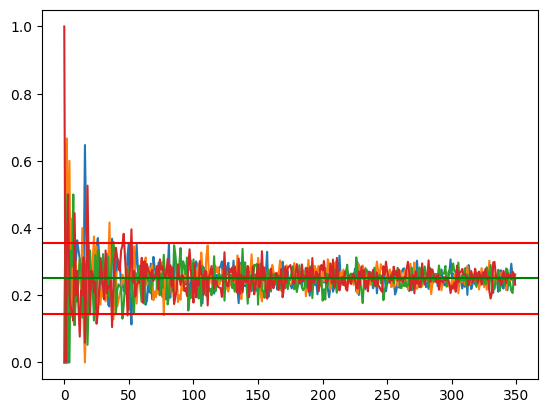

In [9]:
plt.plot(m)
plt.axhline(y=np.mean(m), color="green")
plt.axhline(y=np.mean(m)-1.96*np.std(m), color="r")
plt.axhline(y=np.mean(m)+1.96*np.std(m), color="r")
plt.show()

In [10]:
def simulacion(z):
  lista=[]
  for _ in range(z):
    lista.append(muestra(350))
  return lista

In [11]:
sim=simulacion(35)
#mínimo 30 para poder hacer estadística